In [24]:
import nltk
from nltk.collocations import *

In [25]:
corpus = nltk.corpus.gutenberg
print(type(corpus))

<class 'nltk.corpus.util.LazyCorpusLoader'>


In [26]:
print(corpus.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [27]:
chesterton = corpus.sents("chesterton-brown.txt")
type(chesterton)

nltk.corpus.reader.util.StreamBackedCorpusView

In [28]:
rawchesterton = corpus.raw("chesterton-brown.txt")

In [29]:
print(rawchesterton[0:100])

[The Wisdom of Father Brown by G. K. Chesterton 1914]


I. The Absence of Mr Glass


THE consulting-


In [30]:
stopwords = nltk.corpus.stopwords.words('english')

In [31]:
print(chesterton)

[['[', 'The', 'Wisdom', 'of', 'Father', 'Brown', 'by', 'G', '.', 'K', '.', 'Chesterton', '1914', ']'], ['I', '.'], ...]


In [32]:
chesterton_words = corpus.words("chesterton-brown.txt")

In [33]:
# let's explore the contents of the novel:
print(f"""
    {len(chesterton_words)} words in the novel.
    {len(set(chesterton_words))} unique words in the novel.
    {len(chesterton)} sentences in the novel.
    {round(len(chesterton_words) / len(chesterton), 2)} average sentence length.
    {round(sum([len(w) for w in chesterton_words]) / len(chesterton_words), 2)} average word length.
""")


    86063 words in the novel.
    8299 unique words in the novel.
    3806 sentences in the novel.
    22.61 average sentence length.
    3.79 average word length.



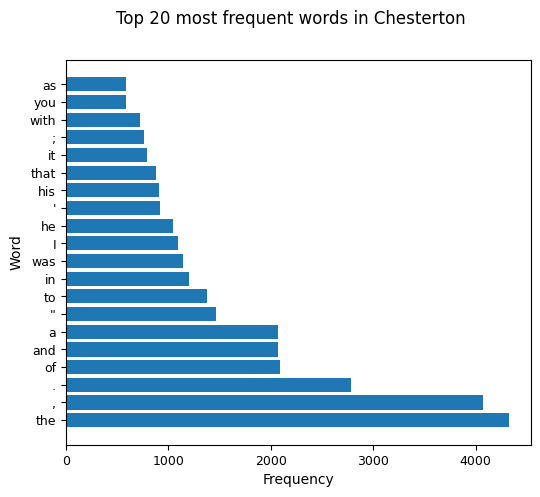

In [34]:
# now let's look at some more useful features:
# such as word frequency, collocations, concordance
import matplotlib.pyplot as plt

def plot_top_n(words, N=20):
    word_freq = nltk.FreqDist(words)
    top_n = word_freq.most_common(N)
    fig, ax = plt.subplots(figsize=(6, N/4))

    fig.suptitle(f"Top {N} most frequent words in Chesterton")
    words, values = zip(*top_n)
    ax.barh(words, values)
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Word")
    ax.tick_params(axis="both", labelsize=9)
    plt.show()

plot_top_n(chesterton_words)

In [35]:
# most common words
def most_common(words, n=5):
    fdist = nltk.FreqDist(words)
    return fdist.most_common(n)

In [36]:
filteredsent = []
txt = rawchesterton.split("\n")



In [37]:
filtered = []
for sentence in chesterton:
    for word in sentence:
        if(word.isalpha() and word not in stopwords and len(word) > 2):
            filtered.append(word.lower())
            
print(filtered[0:10])
bigrams = list(nltk.bigrams(filtered))

        

['the', 'wisdom', 'father', 'brown', 'chesterton', 'the', 'absence', 'glass', 'the', 'consulting']


In [38]:
finder = BigramCollocationFinder.from_words(
    filtered)
bigram_measures = nltk.collocations.BigramAssocMeasures() # Measures unusual frequent bigram associations
finder.apply_freq_filter(7) # Add to get the most frequent expressions
finder.nbest(bigram_measures.pmi, 20)

[('pilgrim', 'pond'),
 ('calhoun', 'kidd'),
 ('wilson', 'seymour'),
 ('prince', 'otto'),
 ('claude', 'champion'),
 ('lord', 'pooley'),
 ('king', 'thieves'),
 ('lord', 'falconroy'),
 ('captain', 'cutler'),
 ('miss', 'rome'),
 ('sir', 'wilson'),
 ('sir', 'claude'),
 ('pendragon', 'park'),
 ('major', 'putnam'),
 ('mrs', 'boulnois'),
 ('dressing', 'room'),
 ('john', 'boulnois'),
 ('old', 'fashioned'),
 ('young', 'lady'),
 ('evening', 'light')]

In [39]:
finder.nbest(bigram_measures.pmi, 20)

[('pilgrim', 'pond'),
 ('calhoun', 'kidd'),
 ('wilson', 'seymour'),
 ('prince', 'otto'),
 ('claude', 'champion'),
 ('lord', 'pooley'),
 ('king', 'thieves'),
 ('lord', 'falconroy'),
 ('captain', 'cutler'),
 ('miss', 'rome'),
 ('sir', 'wilson'),
 ('sir', 'claude'),
 ('pendragon', 'park'),
 ('major', 'putnam'),
 ('mrs', 'boulnois'),
 ('dressing', 'room'),
 ('john', 'boulnois'),
 ('old', 'fashioned'),
 ('young', 'lady'),
 ('evening', 'light')]

In [40]:
bigrams = nltk.bigrams(filtered)
fdist = nltk.FreqDist(bigrams)
#for k,v in sorted(fdist.items(), key = lambda kv: -kv[1]):
#    print(k,v)

In [41]:
from nltk.text import TextCollection

nltk_textcollection = TextCollection(chesterton)

In [455]:
bigrams = nltk.bigrams(filtered)

In [456]:
print(type(tf_vector))

<class 'list'>


In [457]:
linerawchest = rawchesterton.split("\n")

In [458]:
import pandas as pd

In [504]:
def remove_string_special_chars(s):
    # removes special characters with ' '
    stripped = re.sub('[^a-zA-z\s]', '', s)
    stripped = re.sub('_', '', stripped)
      
    # Change any white space to one space
    stripped = re.sub('\s+', ' ', stripped)
      
    # Remove start and end white spaces
    stripped = stripped.strip()
    if stripped != '':
            return stripped.lower()

        
key = {0:'test', 1:''}

regx = re.compile('[^a-zA-z\s]')


# Stopword removal 
stop_words = nltk.corpus.stopwords.words('english')
for i, line in enumerate(txt):
    txt[i] = ' '.join([x for 
        x in nltk.word_tokenize(line) if 
        ( x not in stop_words)])
    
    
print( regx.sub(key[1], txt[0]))

cleantxt = []
for sent in txt:
    newsent = regx.sub(key[1], sent)
    if(newsent == ""):
        continue
    cleantxt.append(newsent)
        

    
print(cleantxt[0:10])
    


[ The Wisdom Father Brown G K Chesterton  ]
['[ The Wisdom Father Brown G K Chesterton  ]', 'I  The Absence Mr Glass', 'THE consultingrooms Dr Orion Hood  eminent criminologist', 'specialist certain moral disorders  lay along seafront', 'Scarborough  series large welllighted french windows ', 'showed North Sea like one endless outer wall bluegreen marble ', 'In place sea something monotony bluegreen dado ', 'chambers ruled throughout terrible tidiness', 'unlike terrible tidiness sea  It must supposed', 'Dr Hood s apartments excluded luxury  even poetry ']


In [499]:
def filter_text(txt):
    for sent in txt:
        for word in sent.split():
            if(word == ""):
                sent.remove(word)
            else if word.contains

SyntaxError: expected ':' (2818419450.py, line 6)

In [360]:
# Getting trigrams 
vectorizer = CountVectorizer(ngram_range = (3,3))
X1 = vectorizer.fit_transform(txt) 
features = (vectorizer.get_feature_names_out())
print("\n\nFeatures : \n", features)
print("\n\nX1 : \n", X1.toarray())

print("len features = ", len(features))

df = pd.DataFrame(X1.toarray())
print(df)



Features : 
 ['379 mafeking avenue' 'abide things longer' 'abilities would like' ...
 'youth whole story' 'youthful yet gave' 'zaladin world greatest']


X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
len features =  24926
      0      1      2      3      4      5      6      7      8      9      \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
7650      0      0      0      0      0      0      0      0      0      0   
7651      0      0      0      0      0      0      0      0      0    

In [368]:
# Applying TFIDF
vectorizer = TfidfVectorizer(ngram_range = (3,3))

#df = pd.DataFrame(X1.toarray(), columns = tfidf_vect.get_feature_names_out())
X1 = vectorizer.fit_transform(txt)
print(X1.shape)
print(X)
print(X.toarray())
scores = (X1.toarray())
print(type(scores))
print("\n\nScores : \n", scores)

(7655, 24926)
  (0, 18298)	0.6562972144079618
  (0, 5262)	0.3722202744621786
  (0, 1884)	0.6562972144079618
  (1, 16094)	0.7071067811865476
  (1, 23)	0.7071067811865476
  (2, 16214)	0.5773502691896258
  (2, 11214)	0.5773502691896258
  (2, 4412)	0.5773502691896258
  (3, 15039)	0.5
  (3, 10115)	0.5
  (3, 8422)	0.5
  (3, 2467)	0.5
  (4, 14086)	0.7071067811865476
  (4, 8328)	0.7071067811865476
  (5, 14378)	0.3961080116213818
  (5, 13757)	0.3658061109026058
  (5, 11251)	0.37838253600032234
  (5, 10990)	0.3961080116213818
  (5, 10671)	0.37838253600032234
  (5, 8797)	0.3303551596604868
  (5, 4465)	0.3961080116213818
  (6, 14857)	0.5773502691896258
  (6, 13763)	0.5773502691896258
  (6, 11776)	0.5773502691896258
  (7, 16827)	0.5055598620792973
  :	:
  (6326, 13396)	0.32594707892805036
  (6326, 13122)	0.518719308345886
  (6326, 5262)	0.2941926905716192
  (6326, 2574)	0.518719308345886
  (6326, 1939)	0.518719308345886
  (6328, 9127)	0.5859583038918086
  (6328, 6485)	0.559737199228772
  (6328, 632

In [377]:
df5 = pd.DataFrame(X1.toarray(), columns = features)
print(df5)
fatherscore = df5["said father brown"]
print(fatherscore[150:600])


      379 mafeking avenue  abide things longer  abilities would like  \
0                     0.0                  0.0                   0.0   
1                     0.0                  0.0                   0.0   
2                     0.0                  0.0                   0.0   
3                     0.0                  0.0                   0.0   
4                     0.0                  0.0                   0.0   
...                   ...                  ...                   ...   
7650                  0.0                  0.0                   0.0   
7651                  0.0                  0.0                   0.0   
7652                  0.0                  0.0                   0.0   
7653                  0.0                  0.0                   0.0   
7654                  0.0                  0.0                   0.0   

      abject parkinson known  able check substance  able detective german  \
0                        0.0                   0.0        

In [346]:
# Getting top ranking features
sums = X2.sum(axis = 0)

data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0,col] ))
data1 = sorted(data1, key = lambda kv : -kv[1])
print(data1[0:10])
print("""

Get data value:
""")
for tuples in data1:
    if "said father brown" in tuples[0]:
        print(tuples)
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(7))

[('said father brown', 17.569604062324707), ('asked father brown', 5.493181852907615), ('sir wilson seymour', 4.197699390760526), ('replied father brown', 3.3826756704590863), ('sir claude champion', 3.1673940703826355), ('answered father brown', 3.153730725368889), ('two thousand pounds', 2.324244493081856), ('father brown said', 2.2829080618879747), ('why mean asked', 1.9456403116315104), ('said dr hood', 1.7694609949847537)]


Get data value:

('said father brown', 17.569604062324707)


Words head : 
                     term       rank
0      said father brown  17.569604
1     asked father brown   5.493182
2     sir wilson seymour   4.197699
3   replied father brown   3.382676
4    sir claude champion   3.167394
5  answered father brown   3.153731
6    two thousand pounds   2.324244


In [275]:
unseen_sent = "I am a sentence that is not in the corpus"
vector = nltk_textcollection.tf_idf(list(bigrams[0])[0], unseen_sent)
print(vector)

TypeError: 'generator' object is not subscriptable

In [347]:
tf_vector = []
for bigram in bigrams:
    tf_vector.append(nltk_textcollection.tf_idf(bigram[0], " ".join(list(bigram))))
print(tf_vector.head(7))



AttributeError: 'list' object has no attribute 'head'

In [167]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [348]:
# filteredsent

In [ ]:
print(filteredsent[0:10])

In [422]:
import string
import re

In [423]:
def clean_text(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    tokens = re.split('\W+', txt)
    txt = [ps.stem(word) for word in tokens if word not in stopwords]
    return txt

In [91]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ivar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [82]:

tokens = nltk.word_tokenize(" ".join(filtered))
bigrams = nltk.bigrams(tokens)
print(list(bigrams)[0:10])
trigrams = nltk.trigrams(tokens)
print( """


""")
print(list(trigrams)[0:10])



[('the', 'wisdom'), ('wisdom', 'father'), ('father', 'brown'), ('brown', 'chesterton'), ('chesterton', 'the'), ('the', 'absence'), ('absence', 'glass'), ('glass', 'the'), ('the', 'consulting'), ('consulting', 'rooms')]




[('the', 'wisdom', 'father'), ('wisdom', 'father', 'brown'), ('father', 'brown', 'chesterton'), ('brown', 'chesterton', 'the'), ('chesterton', 'the', 'absence'), ('the', 'absence', 'glass'), ('absence', 'glass', 'the'), ('glass', 'the', 'consulting'), ('the', 'consulting', 'rooms'), ('consulting', 'rooms', 'orion')]


In [142]:

tokens = nltk.word_tokenize(" ".join(filtered))
bigrams = nltk.bigrams(tokens)
trigrams = nltk.trigrams(tokens)

bigramfreq = nltk.FreqDist(bigrams)
trigramfreq = nltk.FreqDist(trigrams)

for key,value in trigramfreq.items():
    print(key,value)

('the', 'wisdom', 'father') 1
('wisdom', 'father', 'brown') 1
('father', 'brown', 'chesterton') 1
('brown', 'chesterton', 'the') 1
('chesterton', 'the', 'absence') 1
('the', 'absence', 'glass') 1
('absence', 'glass', 'the') 1
('glass', 'the', 'consulting') 1
('the', 'consulting', 'rooms') 1
('consulting', 'rooms', 'orion') 1
('rooms', 'orion', 'hood') 1
('orion', 'hood', 'eminent') 1
('hood', 'eminent', 'criminologist') 1
('eminent', 'criminologist', 'specialist') 1
('criminologist', 'specialist', 'certain') 1
('specialist', 'certain', 'moral') 1
('certain', 'moral', 'disorders') 1
('moral', 'disorders', 'lay') 1
('disorders', 'lay', 'along') 1
('lay', 'along', 'sea') 1
('along', 'sea', 'front') 1
('sea', 'front', 'scarborough') 1
('front', 'scarborough', 'series') 1
('scarborough', 'series', 'large') 1
('series', 'large', 'well') 1
('large', 'well', 'lighted') 1
('well', 'lighted', 'french') 1
('lighted', 'french', 'windows') 1
('french', 'windows', 'showed') 1
('windows', 'showed', '

In [143]:
trigramfreq = nltk.FreqDist(bigrams)

In [132]:
# use nltks collocation finder to find tfidf
from nltk.text import TextCollection
nltk_textcollection = TextCollection(filtered)

In [2]:
print(tf_idf[0:10])

NameError: name 'tf_idf' is not defined

In [42]:
def find_next_word(words):
    candidate_list = []
    
    # Loop through all words
    # Check for the probability if we were to generate this word
    for word in vocab:
        p1 = get_prob_unigram((word))
        p2 = get_prob_bigram((words[-1], word))
        p3 = get_prob_trigram((words[-2], words[-1], word)) if len(words) >= 3 else 0
        
        # We use linear interpolation
        p =  0.01*p1 + 0.4*p2 + 0.5*p3
        
        candidate_list.append((word, p))
    
    # sort based on the score and select the best one
    candidate_list.sort(key=lambda x: x[1], reverse=True)
    return candidate_list[0]

In [43]:
# TF IDF vectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(2, 2))

X = tfidf_vect.fit(filteredsent)

NameError: name 'TfidfVectorizer' is not defined

In [44]:

def get_prob_bigram(bigram):
    tokens = nltk.word_tokenize(" ".join(filtered))
    bigrams = nltk.bigrams(tokens)
    bigramfreq = nltk.FreqDist(bigrams)
    return bigrams[bigram] / tokens
get_prob_bigram(("father", "brown"))
        

TypeError: 'generator' object is not subscriptable

In [45]:
corpuswords = corpus.words()

In [46]:
# Case folding and getting vocab
lower_case_corpus = [w.lower() for w in corpus.words()]
vocab = set(lower_case_corpus)

In [47]:
print(len(lower_case_corpus))
print(len(vocab))

2621613
42339


In [48]:
def filter_corpus(corpustext):
        filteredtext = []
        stopwords = nltk.corpus.stopwords.words('english')
        for word in corpustext:
            if word not in "[^a-zA-z\s,._]" and word and word not in stopwords and len(word) > 2:
                filteredtext.append(word)
        return filteredtext
            

In [49]:
filteredcorpus = filter_corpus(lower_case_corpus)

In [50]:
print(filteredcorpus[0:100])

['emma', 'jane', 'austen', '1816', 'volume', 'chapter', 'emma', 'woodhouse', 'handsome', 'clever', 'rich', 'comfortable', 'home', 'happy', 'disposition', 'seemed', 'unite', 'best', 'blessings', 'existence', 'lived', 'nearly', 'twenty', 'one', 'years', 'world', 'little', 'distress', 'vex', 'youngest', 'two', 'daughters', 'affectionate', 'indulgent', 'father', 'consequence', 'sister', 'marriage', 'mistress', 'house', 'early', 'period', 'mother', 'died', 'long', 'ago', 'indistinct', 'remembrance', 'caresses', 'place', 'supplied', 'excellent', 'woman', 'governess', 'fallen', 'little', 'short', 'mother', 'affection', 'sixteen', 'years', 'miss', 'taylor', 'woodhouse', 'family', 'less', 'governess', 'friend', 'fond', 'daughters', 'particularly', 'emma', '_them_', 'intimacy', 'sisters', 'even', 'miss', 'taylor', 'ceased', 'hold', 'nominal', 'office', 'governess', 'mildness', 'temper', 'hardly', 'allowed', 'impose', 'restraint', 'shadow', 'authority', 'long', 'passed', 'away', 'living', 'togeth

In [51]:
print(lower_case_corpus[:30])
print(list(vocab)[:10])

['[', 'emma', 'by', 'jane', 'austen', '1816', ']', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed']
['symmetrical', 'cobl', 'clutched', 'eyther', 'disliked', 'practices', 'cobblestones', 'hav', 'jamaica', 'thanes']


In [52]:
bigrams = nltk.bigrams(filteredcorpus)
bigramfreq = nltk.FreqDist(bigrams)

print(get_bigram_count(('by', 'jane')))

print(list(bigramfreq.items())[:15])

1
[(('emma', 'jane'), 2), (('jane', 'austen'), 3), (('austen', '1816'), 1), (('1816', 'volume'), 1), (('volume', 'chapter'), 2), (('chapter', 'emma'), 6), (('emma', 'woodhouse'), 6), (('woodhouse', 'handsome'), 1), (('handsome', 'clever'), 1), (('clever', 'rich'), 1), (('rich', 'comfortable'), 1), (('comfortable', 'home'), 4), (('home', 'happy'), 3), (('happy', 'disposition'), 1), (('disposition', 'seemed'), 1)]


In [53]:
trigrams = nltk.trigrams(filteredcorpus)
trigramfreq = nltk.FreqDist(trigrams)

print(list(trigramfreq.items())[:15])

[(('emma', 'jane', 'austen'), 1), (('jane', 'austen', '1816'), 1), (('austen', '1816', 'volume'), 1), (('1816', 'volume', 'chapter'), 1), (('volume', 'chapter', 'emma'), 2), (('chapter', 'emma', 'woodhouse'), 1), (('emma', 'woodhouse', 'handsome'), 1), (('woodhouse', 'handsome', 'clever'), 1), (('handsome', 'clever', 'rich'), 1), (('clever', 'rich', 'comfortable'), 1), (('rich', 'comfortable', 'home'), 1), (('comfortable', 'home', 'happy'), 1), (('home', 'happy', 'disposition'), 1), (('happy', 'disposition', 'seemed'), 1), (('disposition', 'seemed', 'unite'), 1)]


In [54]:
def get_bigram_count(bigram):
    freq = bigramfreq.items()
    for k, v in freq:
        if k == bigram:
            return int(v)
    else:
        return 1

In [55]:
def get_trigram_count(trigram):
    for k, v in trigramfreq.items():
        if k == trigram:
            return int(v)
    else:
        return 1

In [56]:
print(get_trigram_count(('said', 'father', 'brown')))

56


In [57]:
print(get_bigram_count(('father', 'distinguishes')))

1


In [58]:
print(bigramfreq)

<FreqDist with 675007 samples and 1014676 outcomes>


In [59]:
# Function takes sentence as input and suggests possible words that comes after the sentence  
def suggest_next_word(input_, bigram_counts, trigram_counts, vocab):
    # Consider the last bigram of sentence
    tokenized_input = nltk.word_tokenize(input_.lower())
    last_bigram = tokenized_input[-1:]

    # Calculating probability for each word in vocab
    vocab_probabilities = {}
    for vocab_word in vocab:
        test_bigram = (last_bigram[0], vocab_word)
        
        test_bigram_count = bigram_counts.get(test_bigram, 0)

        probability = test_bigram_count / len(vocab)
        vocab_probabilities[vocab_word] = probability

    # Sorting the vocab probability in descending order to get top probable words
    top_suggestions = sorted(vocab_probabilities.items(), key=lambda x: x[1], reverse=True)[:7]
    return top_suggestions

In [60]:
suggest_next_word("hello", bigramfreq, trigramfreq, vocab)

[('exclaimed', 2.3618885660974514e-05),
 ('bank', 2.3618885660974514e-05),
 ('said', 2.3618885660974514e-05),
 ('symmetrical', 0.0),
 ('cobl', 0.0),
 ('clutched', 0.0),
 ('eyther', 0.0)]

In [61]:
corp = nltk.corpus.gutenberg.words()

In [62]:
print(type([w.lower() for w in nltk.corpus.gutenberg.words()]))

<class 'list'>
